In [72]:
import pandas as pd
import datetime
pd.options.mode.chained_assignment = None

In [73]:
#import data from bulk CSV downloads

file_prefix = 'documents_signed_by_'
pres_names = ['joseph_r_biden_jr', 'donald_trump', 'barack_obama', 'george_w_bush', 'william_j_clinton']
file_suffix = '_of_type_presidential_document_and_of_presidential_document_type_executive_order.csv'
colnames = ['executive_order_number', 'title', 'signing_date', 'disposition_notes']

df_all = pd.DataFrame(columns = colnames)
for name in pres_names:
    filename = file_prefix + name + file_suffix
    df = pd.read_csv(filename)
    df_subset = df[colnames]
    print(name)
    df_all = df_all.append(df_subset, ignore_index = True)
print(df_all.head())
print(df_all.shape)

joseph_r_biden_jr
donald_trump
barack_obama
george_w_bush
william_j_clinton
  executive_order_number                                              title  \
0                  14040  Declassification Reviews of Certain Documents ...   
1                  14041  White House Initiative on Advancing Educationa...   
2                  14039  Blocking Property With Respect to Certain Russ...   
3                  14038  Blocking Property of Additional Persons Contri...   
4                  14037  Strengthening American Leadership in Clean Car...   

  signing_date             disposition_notes  
0   09/03/2021                           NaN  
1   09/03/2021                           NaN  
2   08/20/2021                           NaN  
3   08/09/2021  See: EO 13405, June 16, 2006  
4   08/05/2021                           NaN  
(1098, 4)


In [74]:
df_old = pd.read_csv('cleaned_data.csv')
print(df_old.shape)
print(df_all.shape)
df_all = df_all.append(df_old, ignore_index = True)
df_all['executive_order_number'] = df_all['executive_order_number'].astype(float)
df_all.sort_values(by='executive_order_number', inplace = True)

print(df_all.shape)

(5449, 4)
(1098, 4)
(6547, 4)


In [75]:
#need to add in newer files before below processing

df_all['signing_date'] = pd.to_datetime(df_all['signing_date'])
df_all['president'] = 'name'
df_all['days'] = 0
df_all['count'] = 0
print(df_all.shape)
print(df_all.head())
print(df_all.tail())

(6547, 7)
      executive_order_number  \
1098                  7532.0   
1099                  7533.0   
1100                  7534.0   
1101                  7535.0   
1102                  7536.0   

                                                  title signing_date  \
1098  Establishing Shinnecock Migratory Bird Refuge,...   1937-01-08   
1099  Exemption of James E. Tibbitts From Compulsory...   1937-01-11   
1100  Excluding Land From Sitgreaves National Forest...   1937-01-12   
1101  Partial Revocation of   6110 of May 2, 1933, W...   1937-01-12   
1102  Partial Revocation of   5687 of August 18, 193...   1937-01-12   

                                      disposition_notes president  days  count  
1098  Federal Register page and date: 2 FR 63, Janua...      name     0      0  
1099  Note: This Executive order was not received fo...      name     0      0  
1100  Federal Register page and date: 2 FR 87, Janua...      name     0      0  
1101  Federal Register page and date: 2 

In [76]:
#next step - add column with president name
df_inaug = pd.read_csv('inaug_dates.csv')
today = datetime.date.today()
print(today)
df_inaug.loc[len(df_inaug.index)] = ['Today', today]

df_inaug['inaug_date'] = pd.to_datetime(df_inaug['inaug_date'])
print(df_inaug)

2021-09-19
                    name inaug_date
0   Franklin D Roosevelt 1933-03-04
1         Harry S Truman 1945-04-12
2    Dwight D Eisenhower 1953-01-20
3         John F Kennedy 1961-01-20
4       Lyndon B Johnson 1963-11-22
5          Richard Nixon 1969-01-20
6            Gerald Ford 1974-04-09
7           Jimmy Carter 1977-01-20
8          Ronald Reagan 1981-01-20
9        George H W Bush 1989-01-20
10     William J Clinton 1993-01-20
11         George W Bush 2001-01-20
12          Barack Obama 2009-01-20
13          Donald Trump 2017-01-20
14        Joseph R Biden 2021-01-20
15                 Today 2021-09-19


In [77]:
#subset df by dates
for i in range(df_inaug.shape[0] - 1):
    name = df_inaug.at[i, 'name']
    start_date = df_inaug.at[i, 'inaug_date']
    end_date = df_inaug.at[i+1, 'inaug_date']

    df_subset = df_all.loc[(df_all['signing_date'] >= start_date) & (df_all['signing_date'] < end_date)]
    df_subset['president'] = df_inaug.at[i, 'name']
    df_subset['days'] = df_subset['signing_date'] - start_date
    #can't straight subtract due to -A orders
    #can't go by index due to misordering
    df_subset['count'] = [*range(1, df_subset.shape[0] + 1)]
    #have to update for FDR, data starts partway through his presidency
    if i == 0:
        df_subset['count'] = df_subset['count'] + 1715
    df_all.update(df_subset)
    print(name, start_date, end_date)
    print(df_subset.shape)
    
print(df_all.head())

Franklin D Roosevelt 1933-03-04 00:00:00 1945-04-12 00:00:00
(2025, 7)
Harry S Truman 1945-04-12 00:00:00 1953-01-20 00:00:00
(908, 7)
Dwight D Eisenhower 1953-01-20 00:00:00 1961-01-20 00:00:00
(484, 7)
John F Kennedy 1961-01-20 00:00:00 1963-11-22 00:00:00
(214, 7)
Lyndon B Johnson 1963-11-22 00:00:00 1969-01-20 00:00:00
(325, 7)
Richard Nixon 1969-01-20 00:00:00 1974-04-09 00:00:00
(325, 7)
Gerald Ford 1974-04-09 00:00:00 1977-01-20 00:00:00
(190, 7)
Jimmy Carter 1977-01-20 00:00:00 1981-01-20 00:00:00
(320, 7)
Ronald Reagan 1981-01-20 00:00:00 1989-01-20 00:00:00
(381, 7)
George H W Bush 1989-01-20 00:00:00 1993-01-20 00:00:00
(166, 7)
William J Clinton 1993-01-20 00:00:00 2001-01-20 00:00:00
(366, 7)
George W Bush 2001-01-20 00:00:00 2009-01-20 00:00:00
(291, 7)
Barack Obama 2009-01-20 00:00:00 2017-01-20 00:00:00
(276, 7)
Donald Trump 2017-01-20 00:00:00 2021-01-20 00:00:00
(219, 7)
Joseph R Biden 2021-01-20 00:00:00 2021-09-19 00:00:00
(57, 7)
      executive_order_number  \
109

In [78]:
df_all['days'] = df_all['days'].dt.days
print(df_all.head())

      executive_order_number  \
1098                  7532.0   
1099                  7533.0   
1100                  7534.0   
1101                  7535.0   
1102                  7536.0   

                                                  title signing_date  \
1098  Establishing Shinnecock Migratory Bird Refuge,...   1937-01-08   
1099  Exemption of James E. Tibbitts From Compulsory...   1937-01-11   
1100  Excluding Land From Sitgreaves National Forest...   1937-01-12   
1101  Partial Revocation of   6110 of May 2, 1933, W...   1937-01-12   
1102  Partial Revocation of   5687 of August 18, 193...   1937-01-12   

                                      disposition_notes             president  \
1098  Federal Register page and date: 2 FR 63, Janua...  Franklin D Roosevelt   
1099  Note: This Executive order was not received fo...  Franklin D Roosevelt   
1100  Federal Register page and date: 2 FR 87, Janua...  Franklin D Roosevelt   
1101  Federal Register page and date: 2 FR 88, Jan

In [79]:
df_all.to_csv('all_data.csv')

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

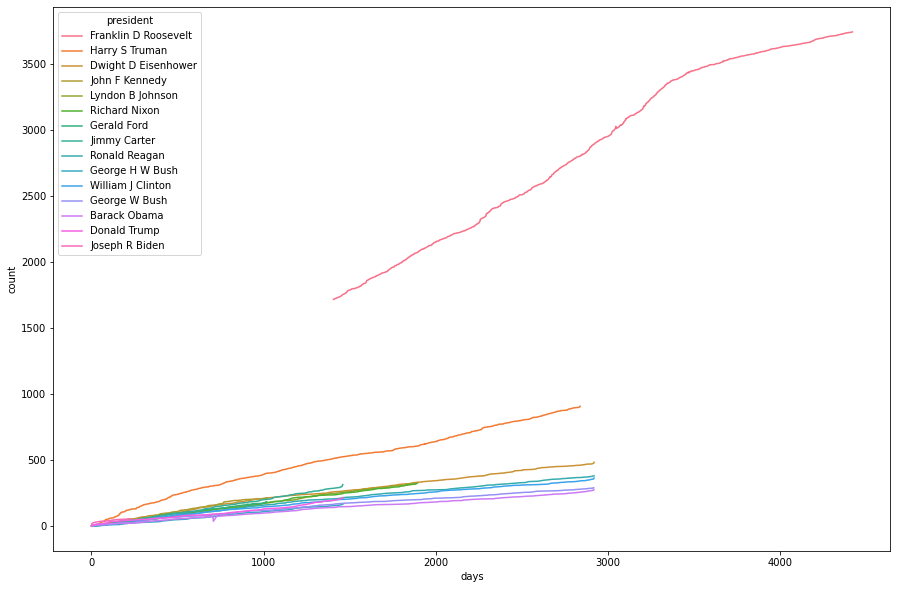

In [81]:
fig, ax = plt.subplots(figsize = (15,10))

sns.lineplot(x='days', y='count', data=df_all, hue='president')
plt.show()

In [82]:
df_subset = df_all[df_all['president'] != 'Franklin D Roosevelt']

In [86]:
print(df_all[df_all['president'] == 'Barack Obama'].head(25))

     executive_order_number  \
550                 13489.0   
551                 13490.0   
547                 13491.0   
548                 13492.0   
549                 13493.0   
543                 13494.0   
544                 13495.0   
545                 13496.0   
546                 13497.0   
542                 13498.0   
538                 13499.0   
539                 13500.0   
540                 13501.0   
541                 13502.0   
536                 13503.0   
537                 13504.0   
535                 13505.0   
534                 13506.0   
533                 13507.0   
532                 13508.0   
531                 13509.0   
530                 13510.0   
529                 13511.0   
528                 13512.0   
527                 13513.0   

                                                 title signing_date  \
550                               Presidential Records   2009-01-21   
551   Ethics Commitments by Executive Branch Person

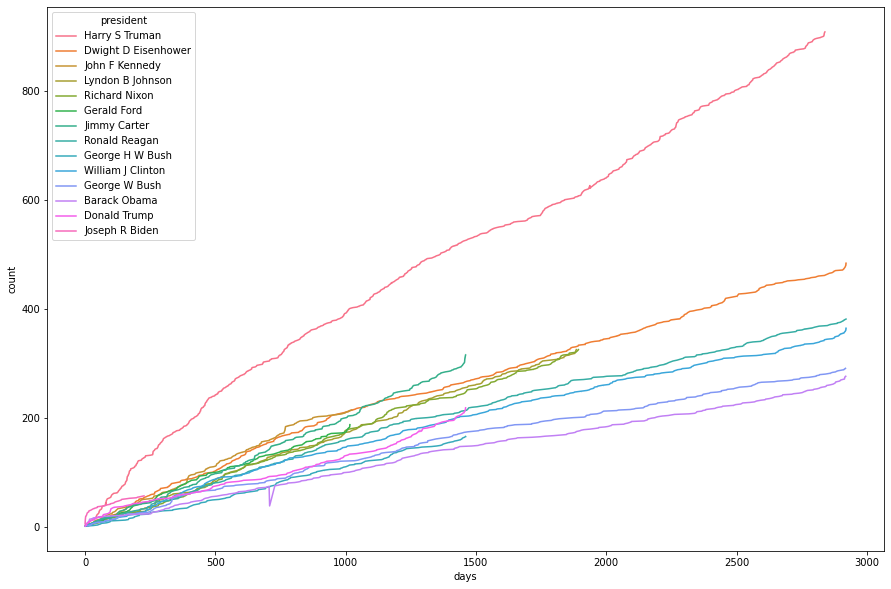

In [83]:
fig, ax = plt.subplots(figsize = (15,10))

sns.lineplot(x='days', y='count', data=df_subset, hue='president')
plt.show()